<a href="https://colab.research.google.com/github/varunkr24/Machine-Learning/blob/Python/PersonaLoanCampaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning

**Context:** 
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customers relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

**Domain:** Banking

**Attribute Informatiion:**
1. ID: Customer ID
2. Age: Customers age in completed years
3. Experience: years of professional experience
4. Income: Annual income of the customer in thousand dollars
5. ZIP Code: Home Address ZIP code
6. Family: Family size of the customer
7. CCAvg: Avg. spending on credit cards per month thousand dollars)
8. Education: Education Level 1 is Undergrad 2 is Graduate 3 is Advanced or Professional
9. Mortgage: Value of house mortgage if any thousand dollars
10. Personal Loan: Did this customer accept the personal loan offered in thelast campaign?
11. Securities Account: Does the customerhave a securities account withthe bank?
12. CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
13. Online: Does the customer use internet banking facilities?
14. Credit card: Does the customer use a credit card issued by Thera bank?

**Objective: **
The classification goal is to predict the likelihood of a liability customer buying personal loans.

**Let's start**

**Import necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline
# tells python to actually display the graphs

**Loading the data**

In [ ]:
df_PL = pd.read_csv("//blackstone.com/files/home/americas/new york/yadavv/Documents/Olympus/Bank_Personal_Loan_Modelling.csv")

**Reading top 5 rows**

In [ ]:
df_PL.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


All the columns are integer type.  
Values in Education and Family represent certain category and already given in a particular order so do not require any further treatment.  
Securities Account, CD Account, Online, Credit card are already in binary form i.e. 0 and 1 so do not require any further treatment.  
ID represent an ID given to customers by Thera Bank and does not posses any other useful infomation so can be ignored as and when required.  

**Dimension of data**

In [ ]:
df_PL.shape

(5000, 14)

**Data type**

In [ ]:
df_PL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Missing data**

In [ ]:
df_PL.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

There is no missing values in dataframe.

**5 number summary**

In [ ]:
df_PL.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Age seems to have fair spread with min. value of 23, max. value of 67 and median value of 45.  
Experience column has min. value of -3 which does not look like a valid number and require scrutiny.  
Income seems to be skewed towards right with min. value 8, max. value 224, median 64 and mean 73.7. Income may contain outliers.   
Mortage is highly skewed towards right since mean 56.4 > median 0. Only last 25 percentile of the people have mortgage loan.  
Similarily, Only last 25 percentile of the people have Securities Account, CD Account and Personal Loan.

**Scrutiny of negative values in Experience**

Subset data with negative experience and run 5 numbers summary

In [ ]:
neg_exp = df_PL[df_PL.Experience < 0]
neg_exp.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,52.0,2427.346154,1478.834118,90.0,767.25,2783.5,3669.500,4958.0
Age,52.0,24.519231,1.475159,23.0,24.00,24.0,25.000,29.0
Experience,52.0,-1.442308,0.639039,-3.0,-2.00,-1.0,-1.000,-1.0
Income,52.0,69.942308,37.955295,12.0,40.75,65.5,86.750,150.0
ZIP Code,52.0,93240.961538,1611.654806,90065.0,92167.75,93060.0,94720.000,95842.0
Family,52.0,2.865385,0.970725,1.0,2.00,3.0,4.000,4.0
CCAvg,52.0,2.129423,1.750562,0.2,1.00,1.8,2.325,7.2
Education,52.0,2.076923,0.836570,1.0,1.00,2.0,3.000,3.0
Mortgage,52.0,43.596154,90.027068,0.0,0.00,0.0,0.000,314.0
Personal Loan,52.0,0.000000,0.000000,0.0,0.00,0.0,0.000,0.0


Age of the people with negative experience ranges from 23 to 29.  
Negative values in Experience are -3, -2, and -1.  
With respect to their ages (from 23 to 29), there is a possibility of having experience from 1 to 3 years.  
There could be a possiblity that negative sign is mistakenly placed before these values since absolute values seems to be in a appropriate range.  
In order to ascertain, Let's have a quick view of data with age less than 30.

**Data with age less than 30**

In [ ]:
df_PL[df_PL.Age < 30]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
11,12,29,5,45,90277,3,0.10,2,0,0,0,0,1,0
22,23,29,5,62,90277,1,1.20,1,260,0,0,0,1,0
54,55,29,5,44,95819,1,0.20,3,0,0,0,0,1,0
58,59,28,2,93,94065,2,0.20,1,0,0,0,0,0,0
74,75,28,3,135,94611,2,3.30,1,0,0,0,0,0,1
85,86,27,2,109,94005,4,1.80,3,0,0,0,0,0,0
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
105,106,24,0,35,94704,3,0.10,2,0,0,1,0,1,0
130,131,28,4,81,94801,3,1.50,1,276,0,0,0,1,0


Just by looking at the data, it is evident that very many people between age 23 and 29 have experience of 1, 2 and 3 years.  
Therefore, simply converting these negative values into positive ones instead of applying any other impuation techniques.

**Coverting negative value of Experience into positive**

In [ ]:
df_PL.Experience = df_PL.Experience.abs()

# Exploratory Data Analysis

**Age**

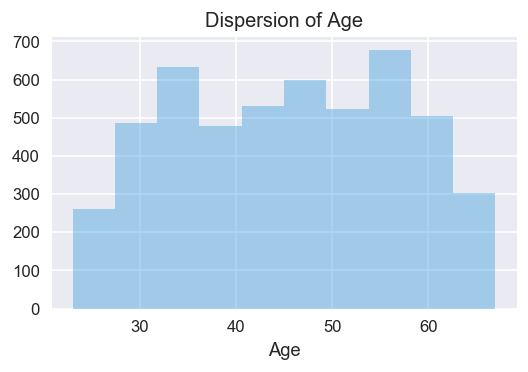

In [ ]:
plt.subplots(figsize=(5,3),dpi=120)
sns.distplot(df_PL.Age, kde=False, bins = 10, color='#3498db');
plt.title("Dispersion of Age");

Highest number of people have age around 55 and lowest number of people have age less than 30

**Experience**

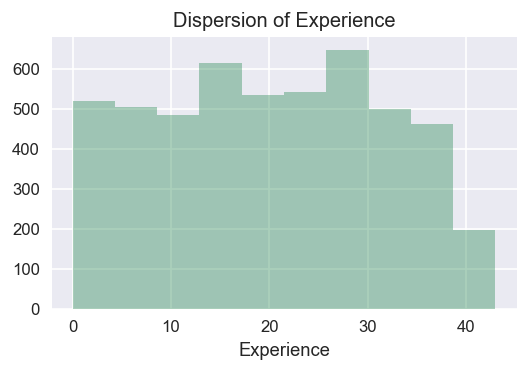

In [ ]:
plt.subplots(figsize=(5,3),dpi=120)
sns.distplot(df_PL.Experience, kde=False, bins = 10, color='seagreen');
plt.title("Dispersion of Experience");

Experience goes almost with the Age as obvious.  
Highest number of people have experience of around 28 years.  
Experience drops after and around 35 which can be linked to age as the number of people drops after and around the age of 58 years. Also, less people will likely to work after the age of 58 years.

**Relationship between Age and Experience**

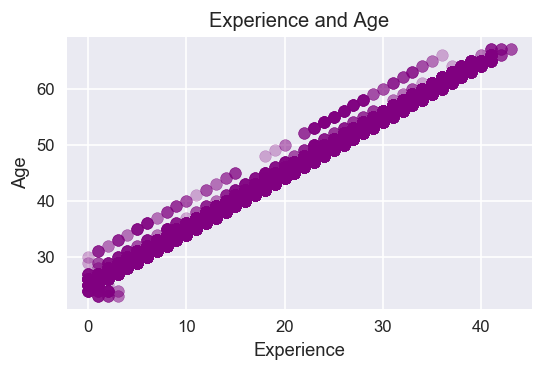

In [ ]:
plt.subplots(figsize=(5,3), dpi=120)
plt.scatter(df_PL.Experience, df_PL.Age,alpha=0.3, c = 'purple')
plt.title('Experience and Age')
plt.xlabel('Experience')
plt.ylabel('Age');

As observed earlier, there is a strong and obvious relation between the two.

**Income**

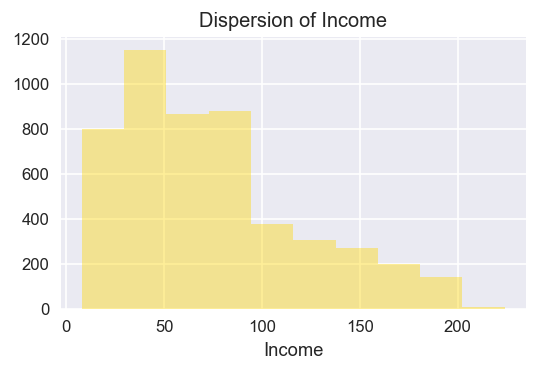

In [ ]:
plt.subplots(figsize=(5,3),dpi=120)
sns.distplot(df_PL.Income, kde=False, bins = 10, color='gold');
plt.title("Dispersion of Income");

Income is positively skewed.  
Most of the people have Income in the range of 0 to 100 and few above 100 (in $000)

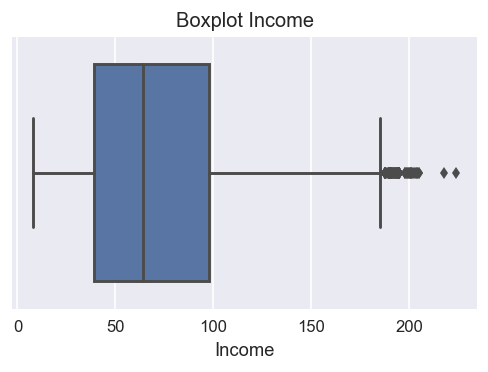

In [ ]:
plt.subplots(figsize=(5,3),dpi=120)
sns.boxplot(df_PL['Income'])
plt.title('Boxplot Income');

Income has outliers which due to fact that it is skewed.

**More exploratory analysis of Income**

**Income across different age and experience.**

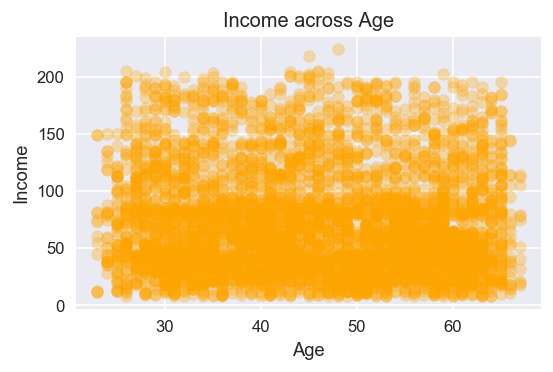

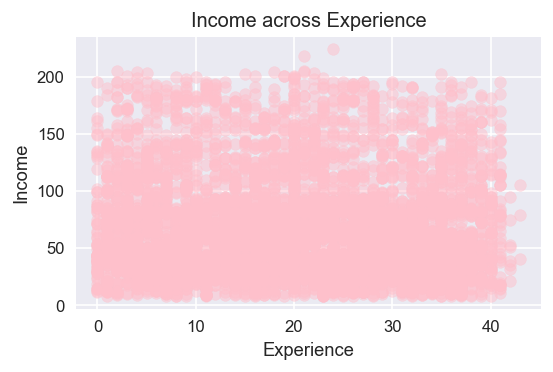

In [ ]:
plt.subplots(figsize=(5,3), dpi=120)
plt.scatter(df_PL.Age, df_PL.Income,alpha=0.3, c = 'orange')
plt.title('Income across Age')
plt.xlabel('Age')
plt.ylabel('Income')

plt.subplots(figsize=(5,3), dpi=120)
plt.scatter(df_PL.Experience, df_PL.Income,alpha=0.5, c = 'pink')
plt.title('Income across Experience')
plt.xlabel('Experience')
plt.ylabel('Income')

plt.show;

It's quite random. No clear reationship can be seen here.

**Mortgage**

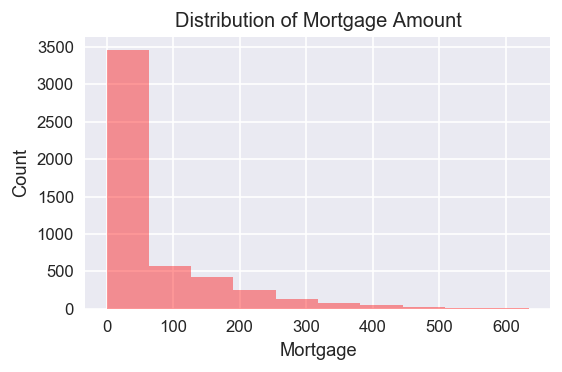

In [ ]:
plt.subplots(figsize=(5,3),dpi=120)
sns.distplot(df_PL.Mortgage, kde=False, bins = 10, color='red');
plt.title("Distribution of Mortgage Amount")
plt.ylabel('Count');

Mortgage amount is positively skewed.  
Mortage amount are in the range of 0 to 75 (roughly) in maximum number of cases.

**More exploratort analysis of Mortgage**

**Mortgage amount across different Experience levels**

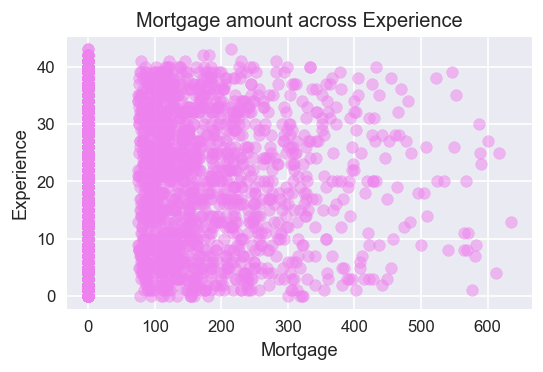

In [ ]:
plt.subplots(figsize=(5,3), dpi=120)
plt.scatter(df_PL.Mortgage, df_PL.Experience,alpha=0.5, c = 'violet')
plt.title('Mortgage amount across Experience')
plt.xlabel('Mortgage')
plt.ylabel('Experience');

No obvious relation can be seen here

**Personal Loan (Target Variable)**

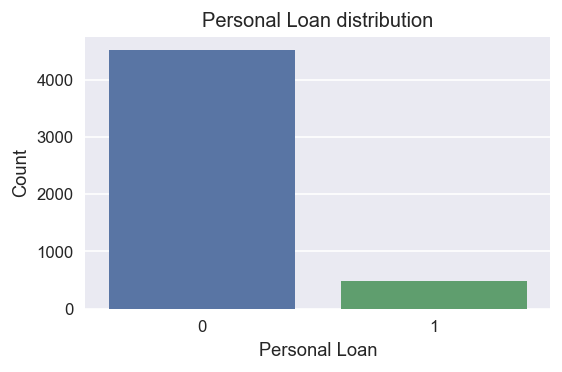

In [ ]:
plt.subplots(figsize=(5,3), dpi=120)
sns.countplot(df_PL['Personal Loan'])
plt.title("Personal Loan distribution")
plt.xlabel('Personal Loan')
plt.ylabel('Count');

Less than 10% of the customers have Personal Loan and others do not.  
Distribution is not balanced therfore any model is likely to give good accuracy even without identifying a single customer with Personal loan. This requires caution while analysing the performance of the model.

**Count of Personal Loan and Non Personal Customers**

In [ ]:
PL = len(df_PL.loc[df_PL['Personal Loan'] == 1])
No_PL = len(df_PL.loc[df_PL['Personal Loan'] == 0])
print("Number of PL cases: {0} ({1:2.2f}%)".format(PL, (PL / (PL + No_PL)) * 100 ))
print("Number of No_PL cases: {0} ({1:2.2f}%)".format(No_PL, (No_PL / (PL + No_PL)) * 100));

Number of PL cases: 480 (9.60%)
Number of No_PL cases: 4520 (90.40%)


**More exploratory analysis of Personal Loan**

**Personal Loan distribution across Family**

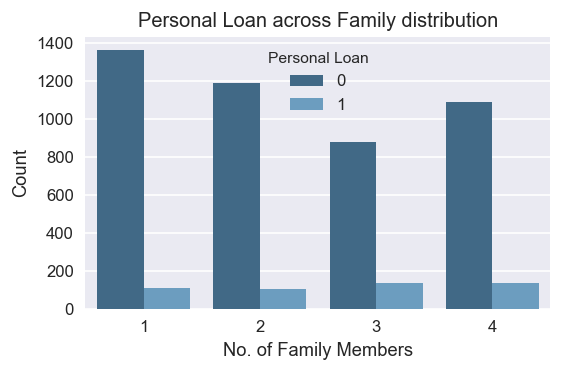

In [ ]:
plt.subplots(figsize=(5,3), dpi=120)
sns.countplot(df_PL['Family'], hue=df_PL['Personal Loan'], palette="Blues_d")
plt.title("Personal Loan across Family distribution")
plt.xlabel('No. of Family Members')
plt.ylabel('Count');

Most of the Personal Loan belongs to customers with 3 and 4 family members.

**Personal Loan Across Income**

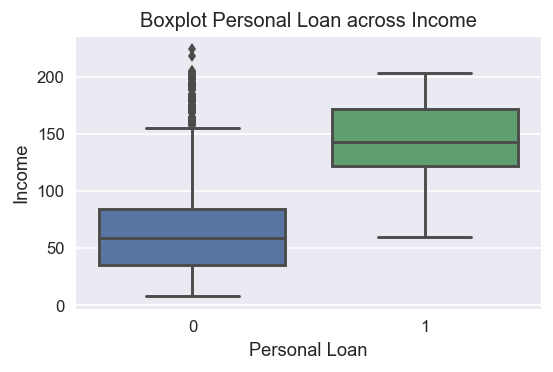

In [ ]:
plt.subplots(figsize=(5,3),dpi=120)
sns.boxplot(y = df_PL['Income'], x = df_PL['Personal Loan'])
plt.title('Boxplot Personal Loan across Income');

1. Outliers in Income belong to the customers with no Personal Loan.  
2. Customers with Personal do have higher average Income.  
3. Also, lower income bound with Personal Loan customers is higher than that of Non Personal Loan customers.

**Personal Loan across  different Mortage amount and Income levels**

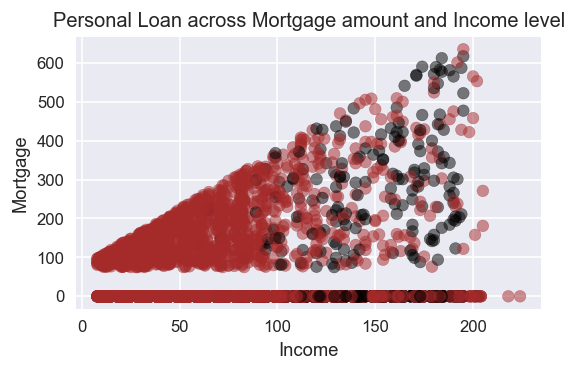

In [ ]:
plt.subplots(figsize=(5,3), dpi=120)
colors = {0:'brown', 1:'black'}
plt.scatter(df_PL.Income, df_PL.Mortgage,alpha=0.5, c= df_PL['Personal Loan'].apply(lambda x: colors[x]))
plt.title('Personal Loan across Mortgage amount and Income level')
plt.xlabel('Income')
plt.ylabel('Mortgage');

Black dots represents Personal Loan customers. Brown dot represents Non Personal Loan Customers.  
  
Most of the Personal Loan belongs to the customer with income level around and above 100 (in $000)

**Personal Loan across average credit card spend and Income levels**

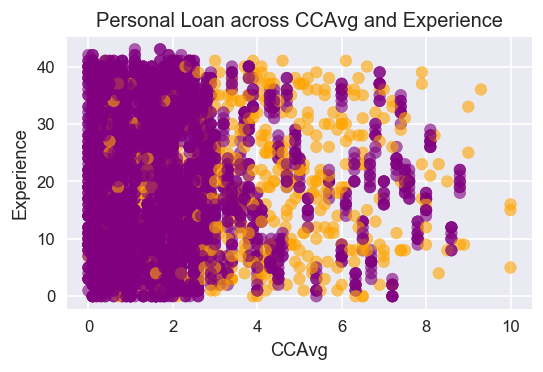

In [ ]:
plt.subplots(figsize=(5,3), dpi=120)
colors = {0:'purple', 1:'orange'}
plt.scatter(df_PL.CCAvg, df_PL.Experience,alpha=0.6, c= df_PL['Personal Loan'].apply(lambda x: colors[x]))
plt.title('Personal Loan across CCAvg and Experience')
plt.xlabel('CCAvg')
plt.ylabel('Experience');

Purple dots represent Personal Loan customers while orange dots represent Non Personal Loan customers.  
  
Maximum Personal Customers have average credit card spend between 0 and 3.

**Personal Loan and Security Account**

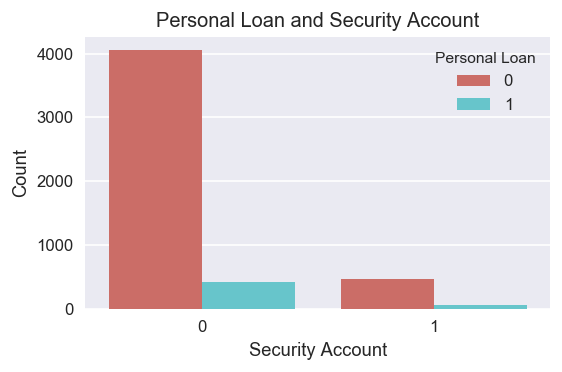

In [ ]:
plt.subplots(figsize=(5,3), dpi=120)
sns.countplot(df_PL['Securities Account'], hue=df_PL['Personal Loan'], palette="hls")
plt.title("Personal Loan and Security Account")
plt.xlabel('Security Account')
plt.ylabel('Count');

Customers with Personal Loan are more in number when they do not have security account or vice-versa.

**Personal Loan and CD Account**

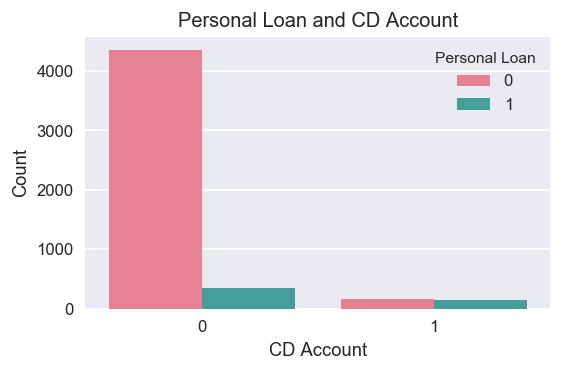

In [ ]:
plt.subplots(figsize=(5,3), dpi=120)
sns.countplot(df_PL['CD Account'], hue=df_PL['Personal Loan'], palette="husl")
plt.title("Personal Loan and CD Account")
plt.xlabel('CD Account')
plt.ylabel('Count');

Customers with Personal Loan are more in number when they do not have CD account or vice-versa.

**Personal Loan and Credit Card**

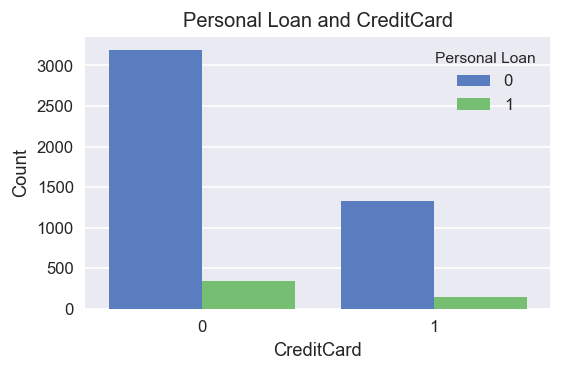

In [ ]:
plt.subplots(figsize=(5,3), dpi=120)
sns.countplot(df_PL['CreditCard'], hue=df_PL['Personal Loan'], palette="muted")
plt.title("Personal Loan and CreditCard")
plt.xlabel('CreditCard')
plt.ylabel('Count');

Customers with Personal Loan are more in number when they do not have Credit card or vice-versa.

**Personal Loan and Online**

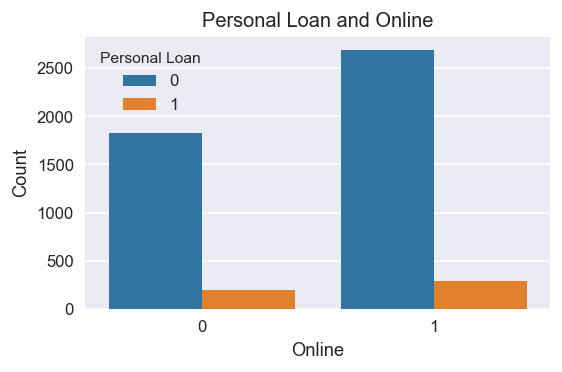

In [ ]:
plt.subplots(figsize=(5,3), dpi=120)
sns.countplot(df_PL['Online'], hue=df_PL['Personal Loan'], palette="tab10")
plt.title("Personal Loan and Online")
plt.xlabel('Online')
plt.ylabel('Count');

Customers with Personal Loan with Online banking facility are more in number.

**Pair-Wise Plot of multiple variable**  
Variable on X and Y are different to have clear view of graph.

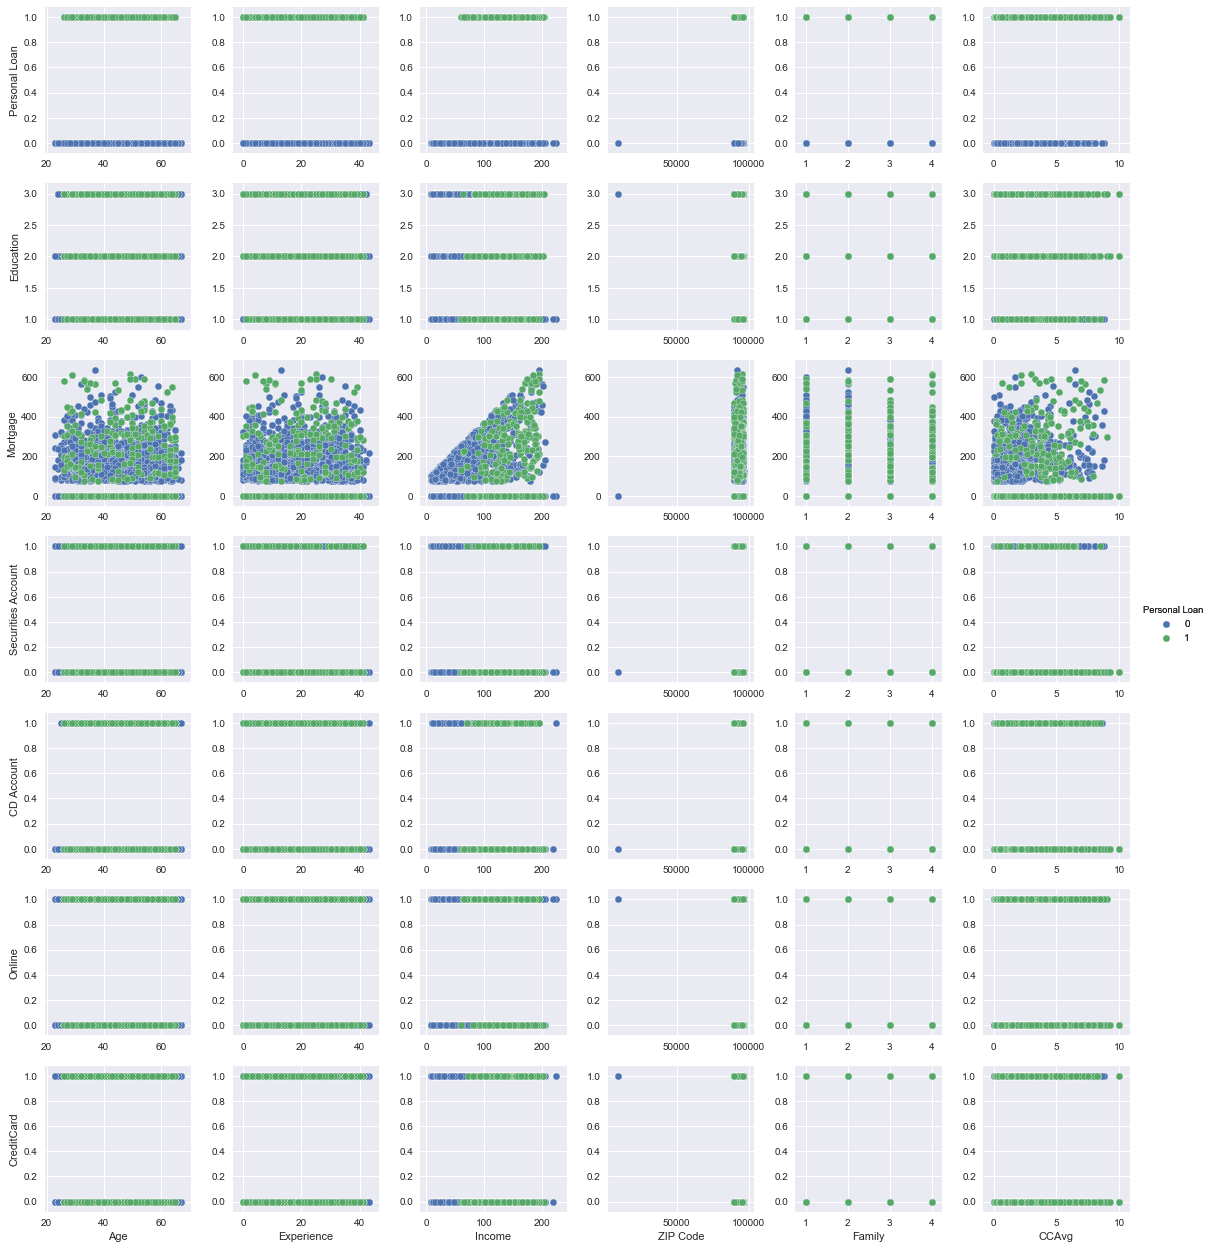

In [ ]:
x_vars = ["Age", "Experience", "Income", "ZIP Code","Family","CCAvg"]
y_vars = ["Personal Loan", "Education", "Mortgage", "Securities Account", "CD Account","Online","CreditCard"]
g = sns.pairplot(df_PL,  x_vars=x_vars, y_vars=y_vars, hue = "Personal Loan")
g.add_legend()
plt.show();

**Correlation Matrix**

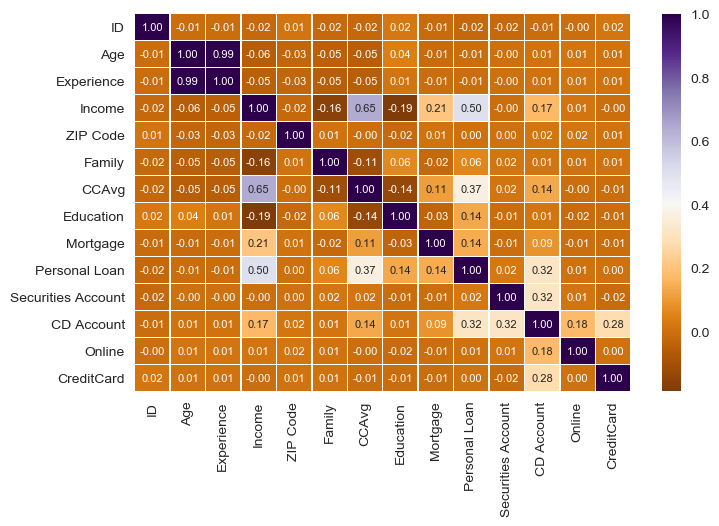

In [ ]:
corr = df_PL.corr()
plt.subplots(figsize=(8,5),dpi=100)
sns.heatmap(corr, cmap = "PuOr", annot=True,fmt = '.2f',annot_kws={"size": 8},cbar=True, linewidths = .3);

Age has very strong and positive relation with Experience.  
Income has strong and positive relation with CCAvg.

# Pre-processing of model development

**Bifurcating data into training and testing data in 70/30 ratio.**

In [ ]:
from sklearn.model_selection import train_test_split

X = df_PL.drop('Personal Loan',axis=1)     # Predictor feature columns
Y = df_PL['Personal Loan']   # Predicted class (1=PL, 0=No PL) 

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,1335,47,22,35,94304,2,1.3,1,0,0,0,1,0
4768,4769,38,14,39,93118,1,2.0,2,0,0,0,1,0
65,66,59,35,131,91360,1,3.8,1,0,0,0,1,1
177,178,29,3,65,94132,4,1.8,2,244,0,0,0,0
4489,4490,39,13,21,95518,3,0.2,2,0,0,0,1,0


**Drop ID column since it does not add any value to the data.**

In [ ]:
x_train = x_train.drop('ID',axis=1) 
x_test = x_test.drop('ID',axis=1)

x_train.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,47,22,35,94304,2,1.3,1,0,0,0,1,0
4768,38,14,39,93118,1,2.0,2,0,0,0,1,0
65,59,35,131,91360,1,3.8,1,0,0,0,1,1
177,29,3,65,94132,4,1.8,2,244,0,0,0,0
4489,39,13,21,95518,3,0.2,2,0,0,0,1,0


**Check the split ratio**

In [ ]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df_PL.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df_PL.index)) * 100))

70.00% data is in training set
30.00% data is in test set


**Count of Personal and Non Personal Cases in Original, training and testing data**

In [ ]:
print("Original Personal Loan Values    : {0} ({1:0.2f}%)".format(len(df_PL.loc[df_PL['Personal Loan'] == 1]), (len(df_PL.loc[df_PL['Personal Loan'] == 1])/len(df_PL.index)) * 100))
print("Original No Personal Loan Values   : {0} ({1:0.2f}%)".format(len(df_PL.loc[df_PL['Personal Loan'] == 0]), (len(df_PL.loc[df_PL['Personal Loan'] == 0])/len(df_PL.index)) * 100))
print("")
print("Training Personal Loan Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training No Personal Loan Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test No Personal Loan Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan Values    : 480 (9.60%)
Original No Personal Loan Values   : 4520 (90.40%)

Training Personal Loan Values    : 331 (9.46%)
Training No Personal Loan Values   : 3169 (90.54%)

Test Personal Loan Values        : 149 (9.93%)
Test No Personal Loan Values       : 1351 (90.07%)



Ratio of Personal and Non Personal cases between training and testing data matches the ratio of Personal and Non Personal cases in original data

# Model development

**1. Logistic Regression**

In [ ]:
#importing necessary libarries
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Fit the model on training data
logit_model = LogisticRegression(solver="liblinear")
logit_model.fit(x_train, y_train)

#predict on test data
y_test_predict = logit_model.predict(x_test)


coef_df = pd.DataFrame(logit_model.coef_)
coef_df['intercept'] = logit_model.intercept_
print(coef_df)

          0         1         2         3         4         5        6  \
0 -0.000437 -0.002548  0.036085 -0.000066  0.015141  0.009439  0.01642   

          7         8         9        10        11  intercept  
0  0.000833  0.000533  0.004674 -0.000176 -0.000067  -0.000105  


**Model Accuracy**

In [ ]:
model_score_train = logit_model.score(x_train, y_train)
print("Score on training data")
print(model_score_train)
print("")
print("Score on test data")
model_score_test = logit_model.score(x_test, y_test)
print(model_score_test)

Score on training data
0.909142857143

Score on test data
0.907333333333


Accurary of training as well as testing data is quite good.

**Some more digging into the model output**

In [ ]:
print("Classification Report:")
print("")
print(metrics.classification_report(y_test, y_test_predict, labels=[1, 0]))

Classification Report:

             precision    recall  f1-score   support

          1       0.57      0.29      0.38       149
          0       0.93      0.98      0.95      1351

avg / total       0.89      0.91      0.89      1500



Recall for Class 1 (Sensitivity) is very low i.e. 29% only.  
Model is able to predict only 29% of the total Personal Loan cases (True Positive Rate).

**Confusion Matrix**

In [ ]:
cm=metrics.confusion_matrix(y_test, y_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual PL", "Actual No PL"]],
                  columns = [i for i in ["Predicted PL","Predicted No PL"]])
print("Confusion Matrix:")
print("")
df_cm

Confusion Matrix:



,Predicted PL,Predicted No PL
Actual PL,43,106
Actual No PL,33,1318


43  cases (true positives) out of 149 Personal Loan cases in training data was classified correctly where as 106 cases (false negative) are wrongly classified as Non Personal Loan cases --- Type II error  
False negative cases are quite high hence some corrective measures need to be taken.

**ROC Curve**

In [ ]:
from sklearn.metrics import roc_curve

#finding out probabilities from the same model
predict_probabilities = logit_model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict)

Function to visualise ROC curve, will use the same function in below analysis.

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

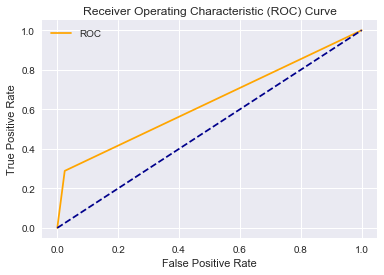

In [ ]:
plot_roc_curve(fpr, tpr)

In order to get the better classification of classes, True Postive rate should be maximised and False Positive rate should be minimised. Here TPR is very low.

# Scale the independent variables using Z score 
**Different scale of independent variables may lead to improper classification.**

In [ ]:
from scipy.stats import zscore

x_train_scaled  = x_train.apply(zscore)
x_test_scaled  = x_test.apply(zscore)

**Logistic Regression on scaled data**

In [ ]:
# Fit the model on training data
logit_model_new = LogisticRegression(solver="liblinear")
logit_model_new.fit(x_train_scaled, y_train)

#predict on testing data
y_test_scaled_predict = logit_model_new.predict(x_test_scaled)

Coefficient of independent variable to see the importance

In [ ]:
coef_imp = logit_model_new.coef_[0]
for i,v in enumerate(coef_imp):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.06914
Feature: 1, Score: 0.12246
Feature: 2, Score: 2.31862
Feature: 3, Score: 0.02012
Feature: 4, Score: 0.77864
Feature: 5, Score: 0.29293
Feature: 6, Score: 1.34851
Feature: 7, Score: 0.07675
Feature: 8, Score: -0.34157
Feature: 9, Score: 0.88588
Feature: 10, Score: -0.28699
Feature: 11, Score: -0.50053


**Model Accuracy on Scaled data**

In [ ]:
logit_train_score = logit_model_new.score(x_train_scaled, y_train)
print("Score on training data")
print(logit_train_score)
print("")
print("Score on test data")
logit_test_score = logit_model_new.score(x_test_scaled, y_test)
print(logit_test_score)

Score on training data
0.953428571429

Score on test data
0.947333333333


Model Accuracy on scaled has increased on training as well as on testing data.  
Model Accuracy on non scaled testing data is 0.907333333333 where as Model Accuracy on scaled testing data is 0.947333333333

**Some more digging into Model output**

In [ ]:
print("Classification Report:")
print("")
print(metrics.classification_report(y_test, y_test_scaled_predict, labels=[1, 0]))

Classification Report:

             precision    recall  f1-score   support

          1       0.83      0.59      0.69       149
          0       0.96      0.99      0.97      1351

avg / total       0.94      0.95      0.94      1500



Recall for Class 1 (Sensitivity) comes out to be 59.
Model is able to predict only 59% of the total Personal Loan cases (True Positive Rate).  
There is a significant improvement in performance of model using scaled data both in terms of accuracy and recall.  
Recall in non scaled data is 29%

In [ ]:
logit_cm_scaled=metrics.confusion_matrix(y_test, y_test_scaled_predict, labels=[1, 0])

df_logit_cm_scaled = pd.DataFrame(logit_cm_scaled, index = [i for i in ["Actual PL", "Actual No PL"]],
                  columns = [i for i in ["Predicted PL","Predicted No PL"]])
print("Confusion Matrix:")
df_logit_cm_scaled

Confusion Matrix:


,Predicted PL,Predicted No PL
Actual PL,88,61
Actual No PL,18,1333


88 cases (true positives) out of 149 Personal Loan cases in testing data was classified correctly where as 61 cases (false negative) are wrongly classified as Non Personal Loan cases --- Type II error  
False negative cases have dropped from 106 previously to 61 where as true positives cases have increased from 43 previously to 88.

**ROC Curve**

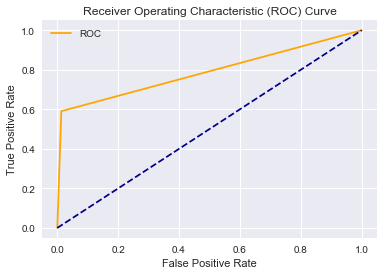

In [ ]:
predict_probabilities_scaled = logit_model_new.predict_proba(x_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_test_scaled_predict)

# plot_roc_curve() function is already created so using the same

plot_roc_curve(fpr, tpr)

Improvement can be seen here.

**Model tuning : Optimal threshold Selection**  

Let's try various threshold (0.7, 0.6, 0.4, 0.3, 0.2)

In [ ]:
threshold = 0.7
y_test_thr_07 = ((logit_model_new.predict_proba(x_test_scaled)[:, 1])>= threshold).astype(int)

print("Classification Report")
print(metrics.classification_report(y_test, y_test_thr_07,labels=[1, 0]))

Classification Report
             precision    recall  f1-score   support

          1       0.93      0.47      0.62       149
          0       0.94      1.00      0.97      1351

avg / total       0.94      0.94      0.94      1500



In [ ]:
threshold = 0.6
y_test_thr_06 = ((logit_model_new.predict_proba(x_test_scaled)[:, 1])>= threshold).astype(int)

print("Classification Report")
print(metrics.classification_report(y_test, y_test_thr_06,labels=[1, 0]))

Classification Report
             precision    recall  f1-score   support

          1       0.90      0.54      0.67       149
          0       0.95      0.99      0.97      1351

avg / total       0.95      0.95      0.94      1500



In [ ]:
threshold = 0.4
y_test_thr_04 = ((logit_model_new.predict_proba(x_test_scaled)[:, 1])>= threshold).astype(int)

print("Classification Report")
print(metrics.classification_report(y_test, y_test_thr_04,labels=[1, 0]))

Classification Report
             precision    recall  f1-score   support

          1       0.77      0.62      0.69       149
          0       0.96      0.98      0.97      1351

avg / total       0.94      0.94      0.94      1500



In [ ]:
threshold = 0.3
y_test_thr_03 = ((logit_model_new.predict_proba(x_test_scaled)[:, 1])>= threshold).astype(int)

print("Classification Report")
print(metrics.classification_report(y_test, y_test_thr_03,labels=[1, 0]))

Classification Report
             precision    recall  f1-score   support

          1       0.69      0.70      0.70       149
          0       0.97      0.97      0.97      1351

avg / total       0.94      0.94      0.94      1500



In [ ]:
threshold = 0.2
y_test_thr_02 = ((logit_model_new.predict_proba(x_test_scaled)[:, 1])>= threshold).astype(int)

print("Classification Report")
print(metrics.classification_report(y_test, y_test_thr_02,labels=[1, 0]))

Classification Report
             precision    recall  f1-score   support

          1       0.59      0.80      0.68       149
          0       0.98      0.94      0.96      1351

avg / total       0.94      0.93      0.93      1500



Performance of the model in terms of Accuracy and Recall is best at 0.3 since Recall and Precision for both the classes i.e. 1 & 0 are balanced/closer to each other and f1-score is also better.
In other cases either Recall and Precision are not balance or f1-score drops.

In [ ]:
logit_cm_thr=metrics.confusion_matrix(y_test, y_test_thr_03, labels=[1, 0])

df_logit_cm_thr = pd.DataFrame(logit_cm_thr, index = [i for i in ["Actual PL", "Actual No PL"]],
                  columns = [i for i in ["Predicted PL","Predicted No PL"]])
print("Confusion Matrix:")
df_logit_cm_thr

Confusion Matrix:


,Predicted PL,Predicted No PL
Actual PL,104,45
Actual No PL,46,1305


Logistic model with threshold 0.3 gives 0.70 of Recall for class-1 with better f-1 score i.e. 0.94.

**ROC Curve**

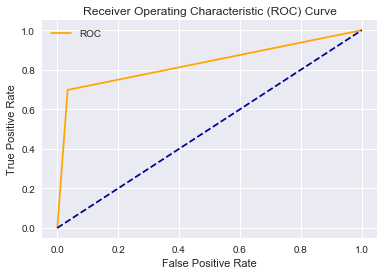

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_thr_03)

# plot_roc_curve() function is already created so using the same

plot_roc_curve(fpr, tpr)

**2. KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

**Run KNN with n_neighbors 1 to 50  
Plot the Model Score to identify the best k**

In [ ]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(x_train_scaled, y_train)
    scores.append(NNH.score(x_test_scaled, y_test))

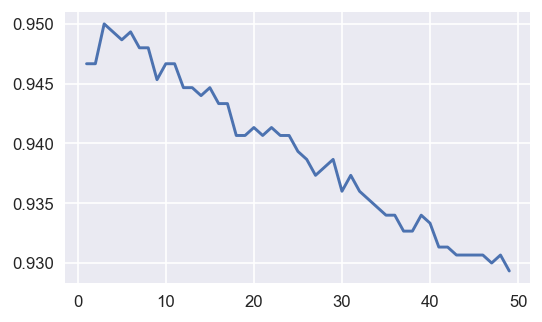

In [ ]:
plt.figure(figsize = (5,3), dpi =120)
plt.plot(range(1,50),scores);

It can be seen in the above graph that model score is best at k = 3

**Try KNN model with k = 3, 5, 7**

In [ ]:
#K = 3
NNH3 = KNeighborsClassifier(n_neighbors=3 , weights = 'distance' )

In [ ]:
NNH3.fit(x_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

In [ ]:
predicted_labels3 = NNH3.predict(x_test_scaled)
print(NNH3.score(x_train_scaled, y_train))
print(NNH3.score(x_test_scaled, y_test))

1.0
0.95


In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test, predicted_labels3, labels=[1, 0]))

Classification Report
             precision    recall  f1-score   support

          1       0.89      0.56      0.69       149
          0       0.95      0.99      0.97      1351

avg / total       0.95      0.95      0.94      1500



In [ ]:
# calculate accuracy measures and confusion matrix

print("Confusion Matrix")
KNN_cm3=metrics.confusion_matrix(y_test, predicted_labels3, labels=[1, 0])

df_KNN_cm3 = pd.DataFrame(KNN_cm3, index = [i for i in ["Actual PL", "Actual No PL"]],
                  columns = [i for i in ["Predicted PL","Predicted No PL"]])
df_KNN_cm3

Confusion Matrix


,Predicted PL,Predicted No PL
Actual PL,84,65
Actual No PL,10,1341


At k = 5

In [ ]:
NNH5 = KNeighborsClassifier(n_neighbors=5 , weights = 'distance' )

NNH5.fit(x_train_scaled, y_train)

predicted_labels5 = NNH5.predict(x_test_scaled)
print('Train Score')
print(NNH5.score(x_train_scaled, y_train))
print("")
print('Test Score')
print(NNH5.score(x_test_scaled, y_test))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, predicted_labels5, labels=[1, 0]))

# calculate accuracy measures and confusion matrix
print("Confusion Matrix")
KNN_cm5=metrics.confusion_matrix(y_test, predicted_labels5, labels=[1, 0])

df_KNN_cm5 = pd.DataFrame(KNN_cm5, index = [i for i in ["Actual PL", "Actual No PL"]],
                  columns = [i for i in ["Predicted PL","Predicted No PL"]])
df_KNN_cm5

Train Score
1.0

Test Score
0.948666666667

Classification Report
             precision    recall  f1-score   support

          1       0.95      0.51      0.66       149
          0       0.95      1.00      0.97      1351

avg / total       0.95      0.95      0.94      1500

Confusion Matrix


,Predicted PL,Predicted No PL
Actual PL,76,73
Actual No PL,4,1347


At k = 7

In [ ]:
NNH7 = KNeighborsClassifier(n_neighbors=7 , weights = 'distance' )

NNH7.fit(x_train_scaled, y_train)

predicted_labels7 = NNH7.predict(x_test_scaled)
print('Train Score')
print(NNH7.score(x_train_scaled, y_train))
print("")
print('Test Score')
print(NNH7.score(x_test_scaled, y_test))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, predicted_labels7, labels=[1, 0]))

# calculate accuracy measures and confusion matrix
print("Confusion Matrix")
KNN_cm7=metrics.confusion_matrix(y_test, predicted_labels7, labels=[1, 0])

df_KNN_cm7 = pd.DataFrame(KNN_cm7, index = [i for i in ["Actual PL", "Actual No PL"]],
                  columns = [i for i in ["Predicted PL","Predicted No PL"]])
df_KNN_cm7

Train Score
1.0

Test Score
0.948

Classification Report
             precision    recall  f1-score   support

          1       0.99      0.48      0.65       149
          0       0.95      1.00      0.97      1351

avg / total       0.95      0.95      0.94      1500

Confusion Matrix


,Predicted PL,Predicted No PL
Actual PL,72,77
Actual No PL,1,1350


Recall for class 1 i.e. 0.56, accuracy of the model i.e. 0.95 and f1-score i.e. 0.94 is best at k =3.  
Therefore optimal k value for KNN is 3.

**3. Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# create a model
bayes_model = GaussianNB()

bayes_model.fit(x_train_scaled, y_train.ravel())

GaussianNB(priors=None)

In [ ]:
bayes_train_predict = bayes_model.predict(x_train_scaled)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, bayes_train_predict)))
print()

Model Accuracy: 0.8903



In [ ]:
bayes_test_predict = bayes_model.predict(x_test_scaled)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, bayes_test_predict)))
print()

Model Accuracy: 0.8693



In [ ]:
# calculate accuracy measures and confusion matrix

print("Confusion Matrix:")
bayes_cm=metrics.confusion_matrix(y_test, bayes_test_predict, labels=[1, 0])

df_bayes_cm = pd.DataFrame(bayes_cm, index = [i for i in ["Actual PL", "Actual No PL"]],
                  columns = [i for i in ["Predicted PL","Predicted No PL"]])

df_bayes_cm

Confusion Matrix:


,Predicted PL,Predicted No PL
Actual PL,78,71
Actual No PL,125,1226


78 cases (true positives) out of 149 Personal Loan cases in training data was classified correctly where as 71 cases (false negative) are wrongly classified as Non Personal Loan cases --- Type II error
False negative cases are quite high.

In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test, bayes_test_predict, labels=[1, 0]))

Classification Report
             precision    recall  f1-score   support

          1       0.38      0.52      0.44       149
          0       0.95      0.91      0.93      1351

avg / total       0.89      0.87      0.88      1500



# Model Selection

**Lets review the model performance of Logistic regression, KNN and Naive Bayes**

1. Logistic Regression performance at 0.3 threshold
2. KNN at k = 3  
3. Naive Bayes

In [ ]:
print("")
print('\033[1m' + '1. Logistic Model Accuracy on test data at k = 3' + '\033[0m')
print(sum(np.diagonal(df_logit_cm_thr))/df_logit_cm_thr.sum().sum())
print("")
print('\033[1m' + "Classification Report: Logistic" + '\033[0m')
print(metrics.classification_report(y_test, y_test_thr_03,labels=[1, 0]))
print("")
print('\033[1m' + "2. KNN Model Accuracy on test data at k = 3 " + '\033[0m')
print(NNH3.score(x_test_scaled, y_test))
print("")
print('\033[1m' + "Classification Report: KNN" + '\033[0m')
print(metrics.classification_report(y_test, predicted_labels3, labels=[1, 0]))
print("")
print('\033[1m' + "3. Naive Bayes Model Accuracy on test data" + '\033[0m')
print(metrics.accuracy_score(y_test, bayes_test_predict))
print("")
print('\033[1m' + "Classification Report: Naive Bayes " + '\033[0m')
print(metrics.classification_report(y_test, bayes_test_predict, labels=[1, 0]))


1. Logistic Model Accuracy on test data at k = 3
0.939333333333

Classification Report: Logistic
             precision    recall  f1-score   support

          1       0.69      0.70      0.70       149
          0       0.97      0.97      0.97      1351

avg / total       0.94      0.94      0.94      1500


2. KNN Model Accuracy on test data at k = 3 
0.95

Classification Report: KNN
             precision    recall  f1-score   support

          1       0.89      0.56      0.69       149
          0       0.95      0.99      0.97      1351

avg / total       0.95      0.95      0.94      1500


3. Naive Bayes Model Accuracy on test data
0.869333333333

Classification Report: Naive Bayes 
             precision    recall  f1-score   support

          1       0.38      0.52      0.44       149
          0       0.95      0.91      0.93      1351

avg / total       0.89      0.87      0.88      1500



**Clearly, Logistic Regression performs better than KNN and Naive Bayes in terms of Recall for class-1 and have the better f1-score to maintain balance between Recall and Precision. Overall Accuracy of Logistic model is 0.93  
Note: High Recall for class-1 can be achieved at the cost of precision.**

# Thank-you